<a href="https://colab.research.google.com/github/T-mony/ML_STOCK_PRICE_PREDICTION/blob/main/Stock_Price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # for classification
from sklearn.ensemble import RandomForestRegressor  # for regression
from sklearn.metrics import accuracy_score, mean_squared_error

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Workshop/NSE-TATAGLOBAL11.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1235 non-null   object 
 1   Open                  1235 non-null   float64
 2   High                  1235 non-null   float64
 3   Low                   1235 non-null   float64
 4   Last                  1235 non-null   float64
 5   Close                 1235 non-null   float64
 6   Total Trade Quantity  1235 non-null   float64
 7   Turnover (Lacs)       1235 non-null   float64
dtypes: float64(7), object(1)
memory usage: 77.3+ KB


In [6]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [7]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
1230,2013-10-14,160.85,161.45,157.70,159.3,159.45,1281419.0,2039.09
1231,2013-10-11,161.15,163.45,159.00,159.8,160.05,1880046.0,3030.76
1232,2013-10-10,156.00,160.80,155.85,160.3,160.15,3124853.0,4978.80
1233,2013-10-09,155.70,158.20,154.15,155.3,155.55,2049580.0,3204.49
1234,2013-10-08,157.00,157.80,155.20,155.8,155.80,1720413.0,2688.94


In [8]:
df.shape

(1235, 8)

In [9]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Last,0
Close,0
Total Trade Quantity,0
Turnover (Lacs),0


  Exploratory Data Analysis(EDA)

In [10]:
number = df.select_dtypes(include= 'number')

Calculated the Mean, Meadian, STD, Variance. For all features

In [11]:
des_statistics= (number.mean(), number.median(), number.std(), number.var())
print(des_statistics)

(Open                    1.689549e+02
High                    1.714291e+02
Low                     1.664023e+02
Last                    1.687364e+02
Close                   1.687311e+02
Total Trade Quantity    2.604151e+06
Turnover (Lacs)         4.843167e+03
dtype: float64, Open                        151.50
High                        153.25
Low                         149.50
Last                        151.20
Close                       151.10
Total Trade Quantity    1964885.00
Turnover (Lacs)            3068.51
dtype: float64, Open                    5.149915e+01
High                    5.243676e+01
Low                     5.054292e+01
Last                    5.158738e+01
Close                   5.154493e+01
Total Trade Quantity    2.277028e+06
Turnover (Lacs)         5.348920e+03
dtype: float64, Open                    2.652162e+03
High                    2.749614e+03
Low                     2.554587e+03
Last                    2.661258e+03
Close                   2.656880e+03
Tot

Range of Stock Dates

In [12]:
df['Date'] = pd.to_datetime(df['Date'])
start_date = df['Date'].min()
end_date = df['Date'].max()

print(f"Date range: {start_date.date()} to {end_date.date()}")

Date range: 2013-10-08 to 2018-10-08


Close Price Distribution

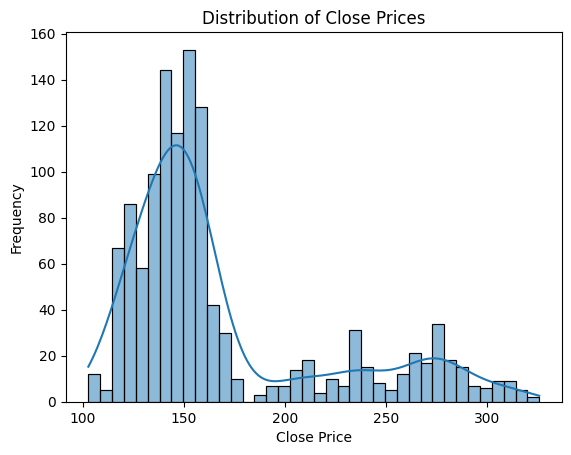

In [13]:
sns.histplot(df['Close'], kde=True)
plt.title('Distribution of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

Close Price Overtime

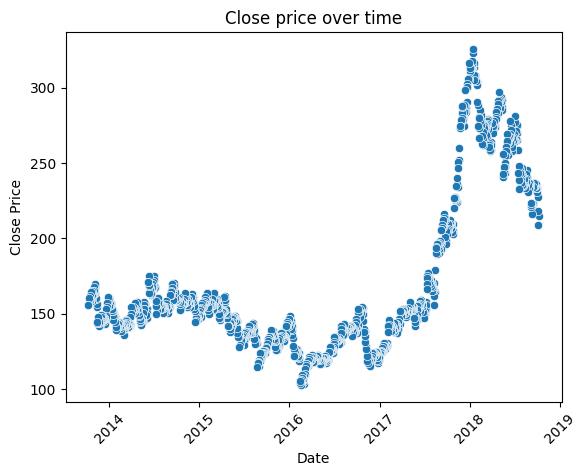

In [14]:
sns.scatterplot(x='Date', y='Close', data=df)
plt.title('Close price over time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.show()

How does the 'Total Trade Quantity' vary over time?

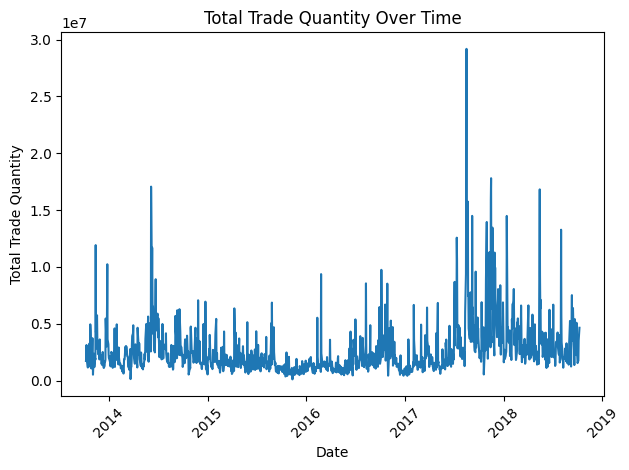

In [15]:
#plt.figure(figsize=(15, 15))
sns.lineplot(x= 'Date', y='Total Trade Quantity', data=df)
plt.title('Total Trade Quantity Over Time')
plt.xlabel('Date')
plt.ylabel('Total Trade Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Is there a correlation between 'Close' price and 'Total Trade Quantity'?

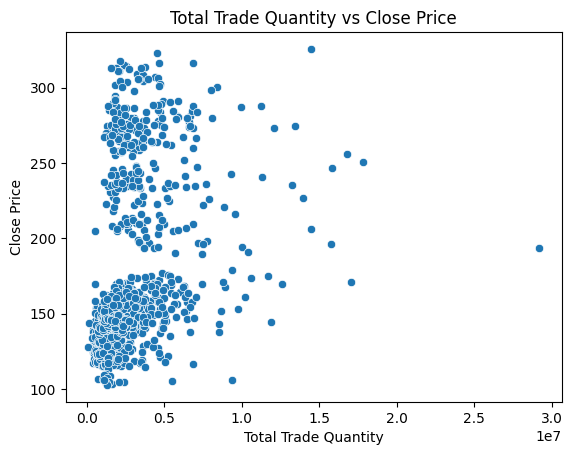

In [16]:
sns.scatterplot(x='Total Trade Quantity', y='Close', data=df)
plt.title('Total Trade Quantity vs Close Price')
plt.xlabel('Total Trade Quantity')
plt.ylabel('Close Price')
plt.show()

Are there any outliers in the numerical columns?

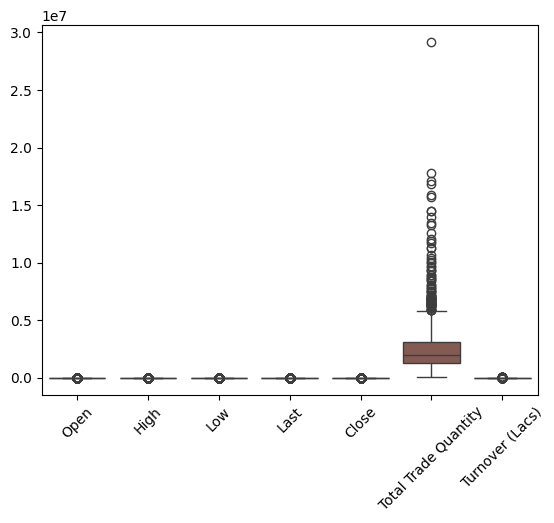

In [17]:
numerial = df.select_dtypes(include= 'number')
sns.boxplot(numerial)
plt.xticks(rotation=45)
plt.show()

How does the 'Turnover (Lacs)' relate to 'Total Trade Quantity'?

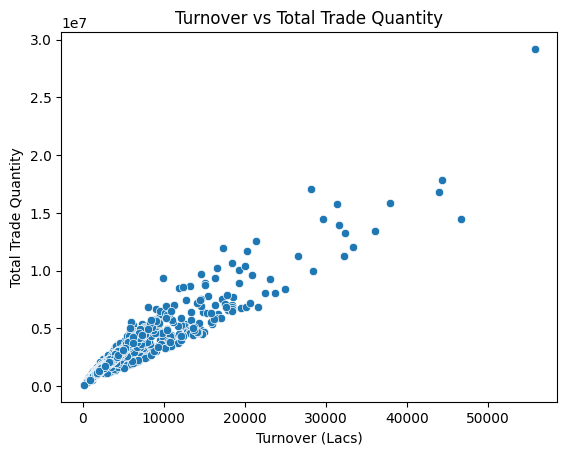

In [18]:
sns.scatterplot(x='Turnover (Lacs)', y='Total Trade Quantity', data=df)
plt.title('Turnover vs Total Trade Quantity')
plt.xlabel('Turnover (Lacs)')
plt.ylabel('Total Trade Quantity')
plt.show()


Applying the Model using random forest

In [30]:
subject = df.drop(['Date', 'Total Trade Quantity'], axis=1)

In [31]:
X = subject.drop('Turnover (Lacs)', axis=1)  # features
y = subject['Turnover (Lacs)']               # target

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [34]:
y_pred = model.predict(X_test)

In [35]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 19078613.078002244


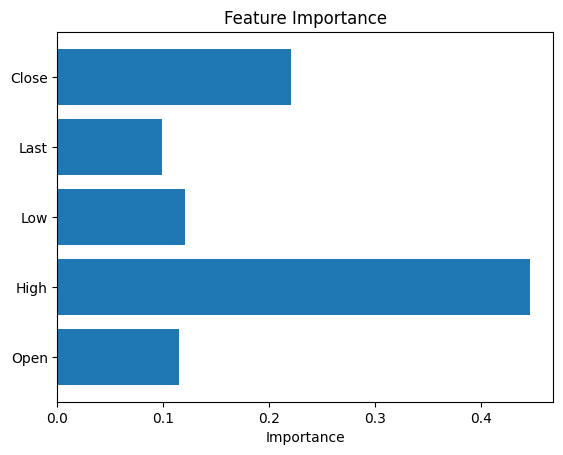

In [36]:
feature_importances = model.feature_importances_
features = X.columns

plt.barh(features, feature_importances)
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()